<a href="https://colab.research.google.com/github/WinnieAnyoso/decision_tree_svm/blob/master/W9_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###a).Defining the problem.
The problem in this case is predicting which factors contributed most to either the survival or non-survval of the passengers on the Titanic ship wreck. Here, we will work with KNN classifier. 


###b). Defining Metrics fro success
Now the metrics of success for this project will be:
1. F1 score of above 75% and above will be considered succesful
2. Accuracy score of 75% and above will be considered succesful
3. Further research on other causes of survival of the passangers will be done. 

###c).Context 
Titanic, in full Royal Mail Ship (RMS) Titanic, was a British luxury passenger liner that sank on April 14th – 15th, 1912, during its maiden voyage, en route to New York City from Southampton, England, killing about 1,500 passengers and ship personnel. One of the most famous tragedies in modern history. 

### d) Recording the Experimental Design

Below are the steps i took to implement this solution:

1) Business Understanding: This sheds light to the context of the business question that we are trying to answer hence keep the focus during the data analysis so that we meet the intended objective. 

2) Reading the data: Reading our data with and aim to understand the variables and observations. 

3) Checking our data: This to get details about the dataset, the number of records, the statistal summary,the datatypes in our dataset among others.

4) Data cleaning, I performed all my data cleaning and preparation to make my data ready for analysis.

5) EDA, the data was analysed and visualized.

6) Implementing the solution using KNN Classifier

7) Challenged the solution.


###e).Data Relevance

#1.Importing Libraries 

In [122]:

# Import Libraries

import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

# Other libraries
import warnings
warnings.filterwarnings('ignore')

#2.Loading Datasets

In [123]:

## Importing the datasets
train = pd.read_csv("train5.csv")
test = pd.read_csv("test1.csv")

#3.Data Exploration

In [124]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [126]:
print ("The shape of the train data is: "+ str(train.shape))
print ("The shape of the test data is: "+ str(train.shape))

The shape of the train data is: (891, 12)
The shape of the test data is: (891, 12)


In [127]:
print (train.info())
print('\n\n')
print('*****************************************')
print('\n\n')
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None



*****************************************



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0

In [128]:
print('Train dataset:')
train.describe().T


Train dataset:


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [129]:

print('Test dataset:')
train.describe().T

Test dataset:


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#4.Tidying ur the Datasets

In [130]:
# Duplicated records
# Checking for duplicates in the data using the duplicated() function
# any() functions returns a true or false result to the query of missing values
# Train set
train.duplicated(keep = 'first').any()


False

In [131]:
test.duplicated(keep = 'first').any()

False

In [132]:
print('Train')
print(train.isnull().sum())
print("\n\n")
print('Test')
print(test.isnull().sum())

Train
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



Test
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [133]:
# Dropping unnecesry columns 
test.drop(['Cabin', 'PassengerId'], axis=1, inplace = True)
test.sample(2)



,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
228,3,"Everett, Mr. Thomas James",male,40.50,0,0,C.A. 6212,15.1,S
201,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4,S


In [134]:
train.drop(['Cabin', 'PassengerId'], axis=1, inplace = True)
train.sample(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
590,0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,S
793,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,C


In [135]:
train['Age'].fillna((train['Age'].mean()), inplace=True)
test['Age'].fillna((test['Age'].mean()), inplace=True)

#5.EDA

###Univariate Analysis 

In [136]:
!pip install -U pandas-profiling

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.8.0)


In [137]:
import pandas_profiling as pp
import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport
ProfileReport(train, title = "Titanic data report")

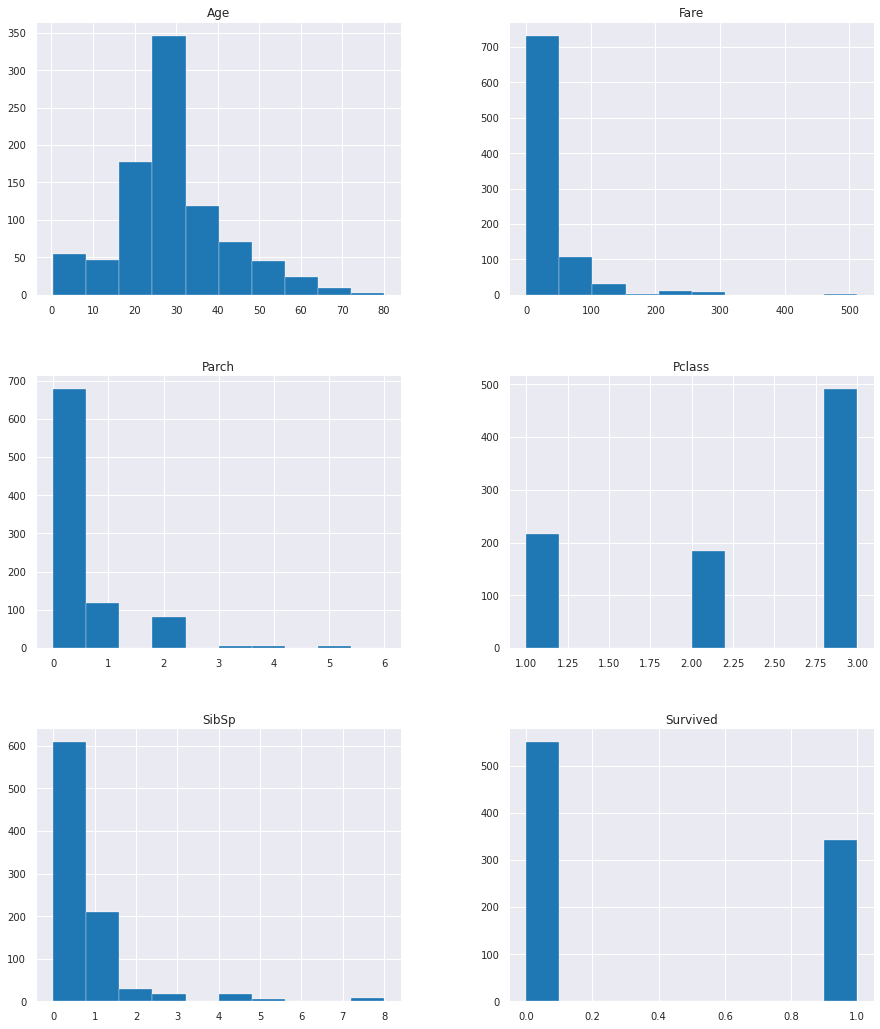

In [138]:

# Histograms
train.hist(figsize=(15,18))
plt.show()

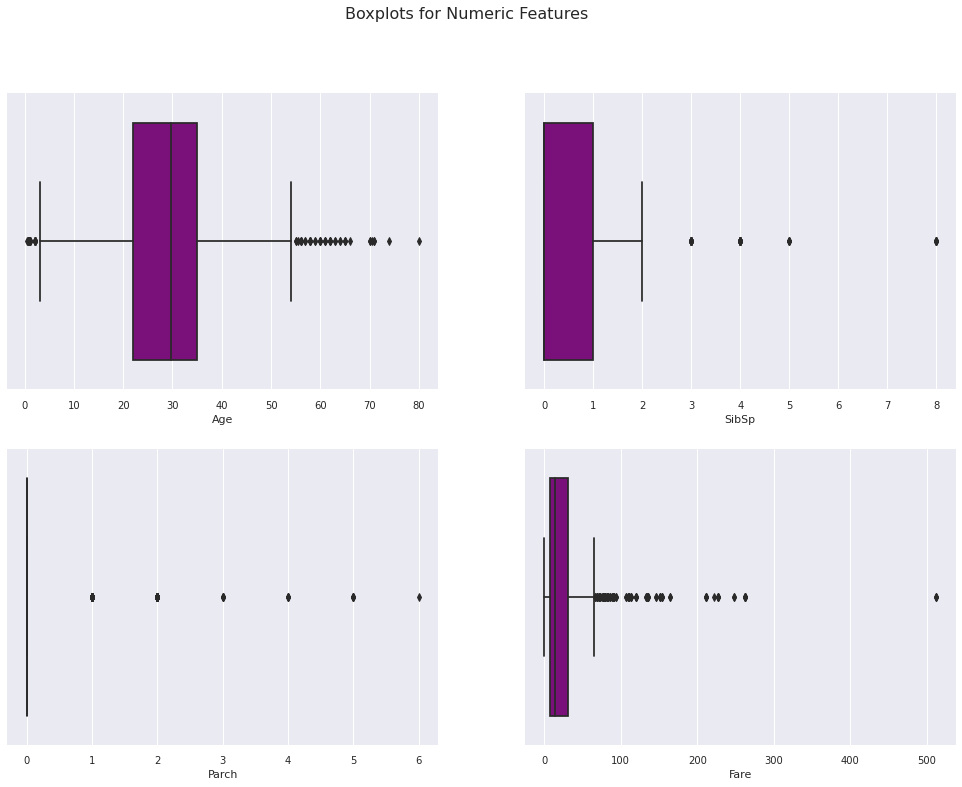

In [139]:
# Checking for outliers using boxplots

numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (17, 12))
for ax, data, name in zip(axes.flatten(), train, numeric_cols):
  sns.boxplot(train[name], color = 'darkmagenta', ax = ax)
  plt.suptitle('Boxplots for Numeric Features', fontsize = 16)
  plt.subplots_adjust()

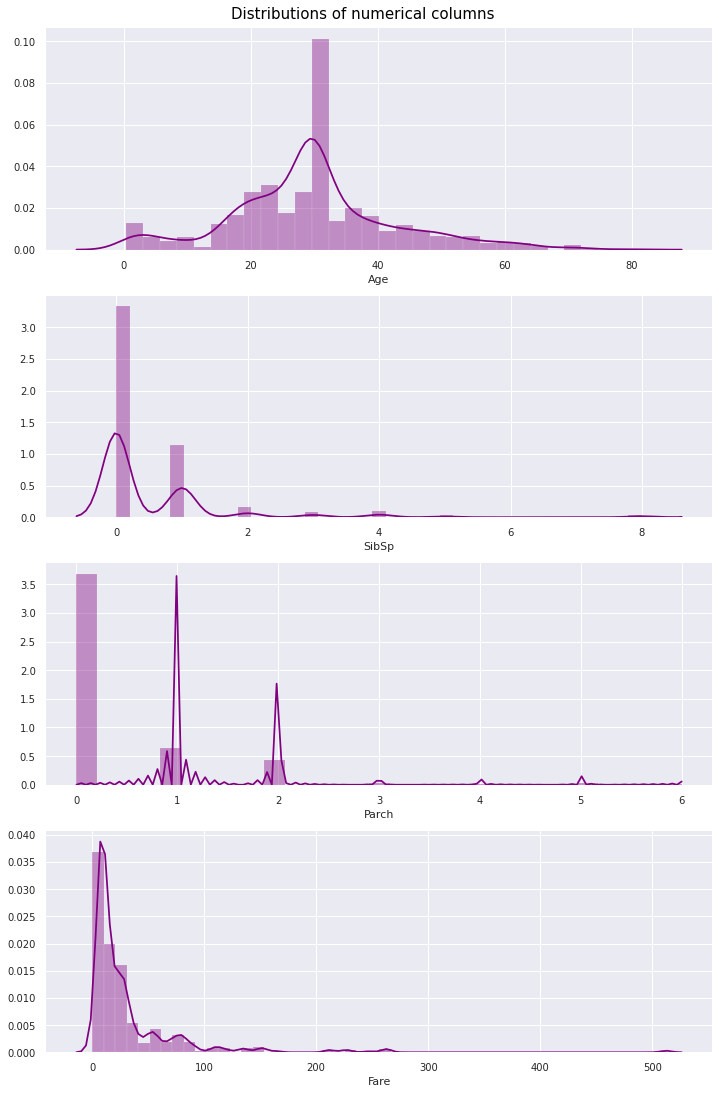

In [140]:
# DISTRIBUTION PLOTS  for numerical columns 
sns.set_style('darkgrid')
fig, axes = plt.subplots(len(numeric_cols), figsize = (10, 15))
fig.suptitle('Distributions of numerical columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, numeric_cols):
  sns.distplot(train[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()

###Bivariate Analysis

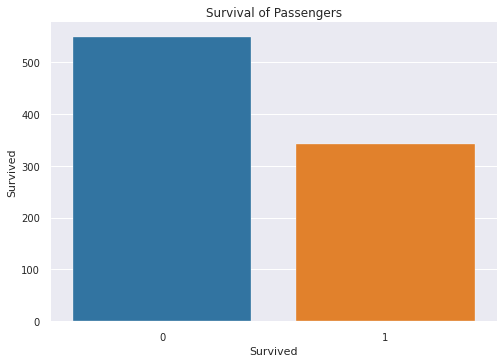

In [141]:
survivors =  train['Survived'].value_counts()
sns.barplot(x = train['Survived'], y = survivors)
plt.title('Survival of Passengers')
plt.show()

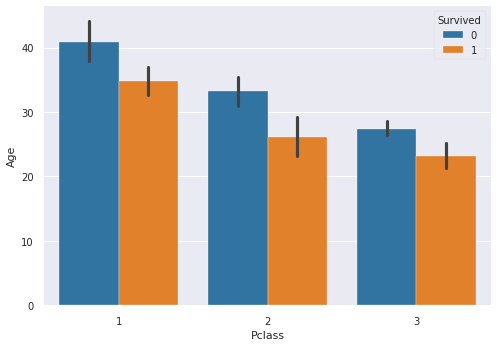

In [142]:
sns.barplot(x= 'Pclass', y = 'Age', data = train, hue='Survived')

In [143]:

corr = train[numeric_cols].corr()
corr

,Age,SibSp,Parch,Fare
Age,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.232625,1.000000,0.414838,0.159651
Parch,-0.179191,0.414838,1.000000,0.216225
Fare,0.091566,0.159651,0.216225,1.000000


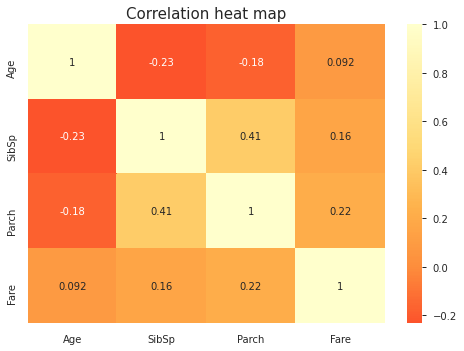

In [144]:
sns.heatmap(corr, cmap='YlOrRd_r', annot = True, center = 0)
plt.title('Correlation heat map', fontsize = 15)
plt.show()

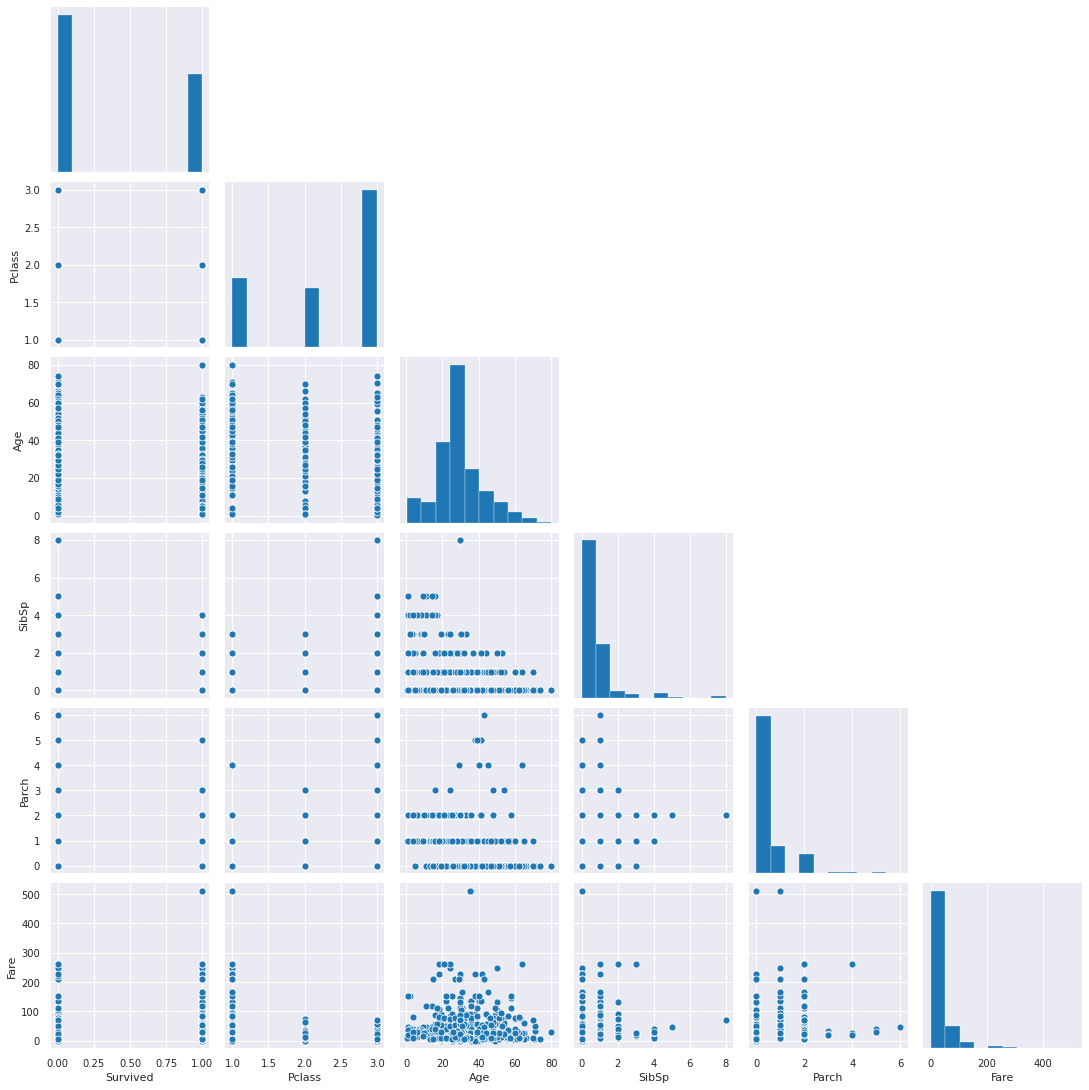

In [145]:
sns.pairplot(train, corner = True)

###Multivariate Analysis


In [146]:
# Correlations among varables vs survived column
pd.DataFrame((train.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
SibSp,-0.035322
Age,-0.069809
Pclass,-0.338481


#6.Feature Engineering 

In [147]:
# Replace missing value with S which is the mode
train['Embarked'].fillna( 'S' , inplace = True)

In [148]:
# ENCODING CATEGORICAL COLUMNS 

train.Sex.replace({'male':0, 'female':1}, inplace = True)
train.Embarked.replace({'S':0, 'C':1, 'Q':2}, inplace = True)

In [149]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1


In [150]:
train.drop(columns = ['Name'], axis = 1 , inplace = True)
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,22.0,1,0,A/5 21171,7.2500,0
1,1,1,1,38.0,1,0,PC 17599,71.2833,1


In [151]:
train.drop(columns = ['Ticket'], axis = 1 , inplace = True)
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1


#7.Solution Implementation


In [152]:
# Splitting the data into the independent and dependent variables
X = train.drop(['Survived'], axis=1)
y = train.Survived

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [153]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [154]:
# Fitting the KNN classifier model to the training data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predicting the outcome
y_pred = knn.predict(X_test)

# Compare the predictions made by the model
comparison_frame = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
comparison_frame.sample(5)

,Actual,Predicted
493,0,0
541,0,0
25,1,0
835,1,1
625,0,0


In [155]:

# 1. Using Classification report
print(classification_report(y_test, y_pred))

# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

[[91 14]
 [21 53]]
F1 Score:  0.7517730496453902


###Hyperparametre tuning 


In [161]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,15))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 11


In [160]:
knn = KNeighborsClassifier(n_neighbors=1, p=1, leaf_size=11)
knn.fit(X_train, y_train)

# Predicting the outcome
y_pred = knn.predict(X_test)

# 1. Using Classification report
print(classification_report(y_test, y_pred))

# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       181
           1       0.70      0.76      0.73       122

    accuracy                           0.77       303
   macro avg       0.76      0.77      0.77       303
weighted avg       0.78      0.77      0.77       303

[[141  40]
 [ 29  93]]
F1 Score:  0.7294117647058823


###  70-30 split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fitting the KNN classifier model to the training data
knn = KNeighborsClassifier(n_neighbors=3, p=1, leaf_size=7)
knn.fit(X_train, y_train)

# Predicting the outcome
y_pred = knn.predict(X_test)

# 1. Using Classification report
print(classification_report(y_test, y_pred))

# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.83      0.70      0.76       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268

[[141  16]
 [ 33  78]]
F1 Score:  0.7609756097560975


###60-40 split


In [157]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fitting the KNN classifier model to the training data
knn = KNeighborsClassifier(n_neighbors=3, p=1, leaf_size=7)
knn.fit(X_train, y_train)

# Predicting the outcome
y_pred = knn.predict(X_test)

# 1. Using Classification report
print(classification_report(y_test, y_pred))

# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       181
           1       0.81      0.71      0.76       122

    accuracy                           0.82       303
   macro avg       0.81      0.80      0.80       303
weighted avg       0.81      0.82      0.81       303

[[160  21]
 [ 35  87]]
F1 Score:  0.7565217391304347
